In [6]:
from ucimlrepo import fetch_ucirepo 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 
  
# variable information 
print(wine_quality.variables) 

                    name     role         type demographic  \
0          fixed_acidity  Feature   Continuous        None   
1       volatile_acidity  Feature   Continuous        None   
2            citric_acid  Feature   Continuous        None   
3         residual_sugar  Feature   Continuous        None   
4              chlorides  Feature   Continuous        None   
5    free_sulfur_dioxide  Feature   Continuous        None   
6   total_sulfur_dioxide  Feature   Continuous        None   
7                density  Feature   Continuous        None   
8                     pH  Feature   Continuous        None   
9              sulphates  Feature   Continuous        None   
10               alcohol  Feature   Continuous        None   
11               quality   Target      Integer        None   
12                 color    Other  Categorical        None   

               description units missing_values  
0                     None  None             no  
1                     None  Non

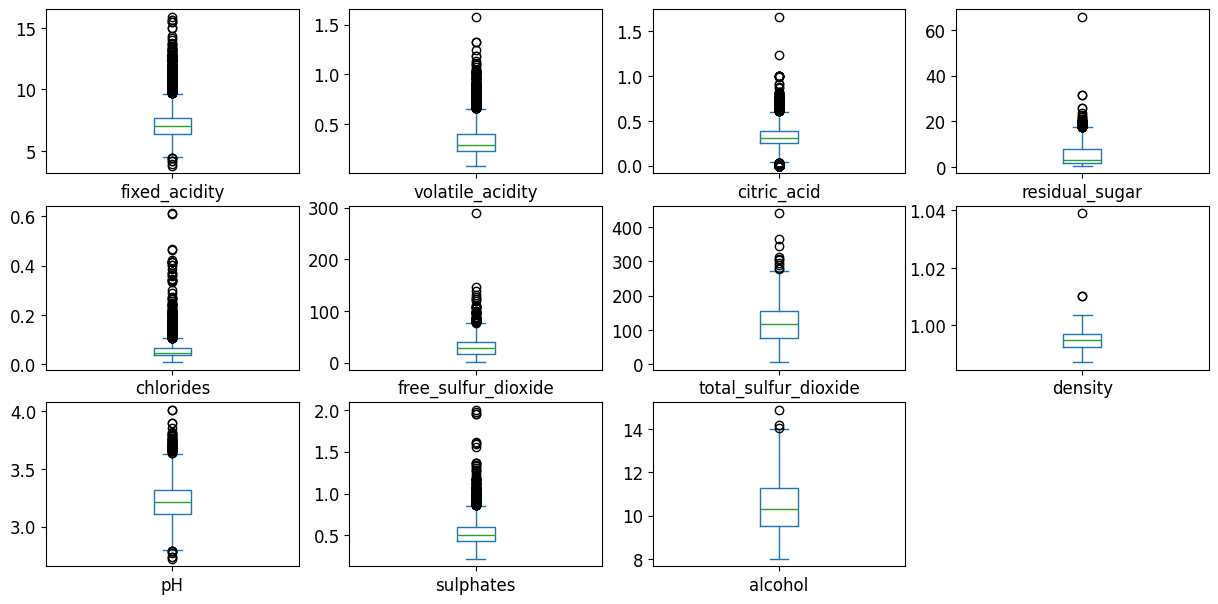

In [7]:
data_mean = X.iloc[:, :]
data_mean.plot(kind='box', subplots=True, layout=(8,4), sharex=False,
sharey=False, fontsize=12, figsize=(15,20));

<Axes: >

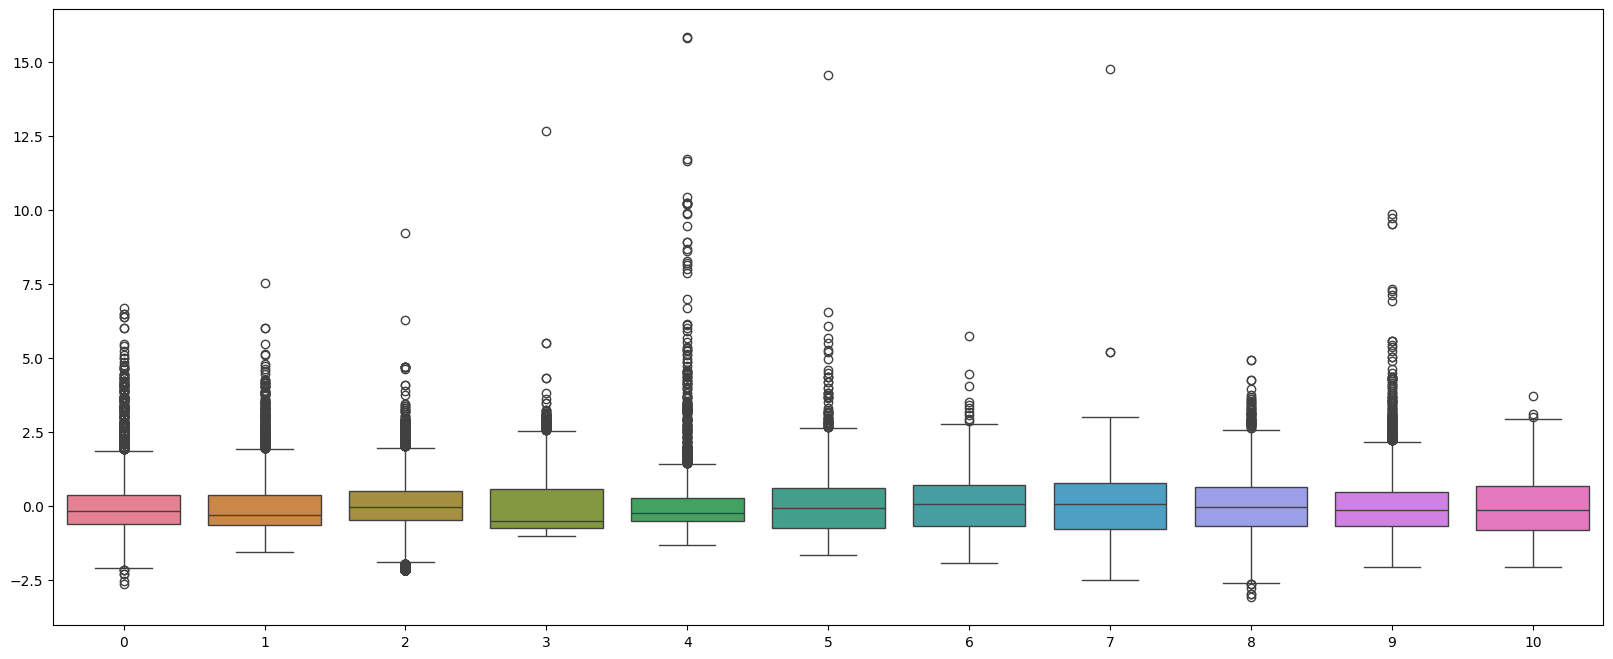

In [8]:
# Standardize features by removing the mean and scaling to unit variance. Xmean = (X-u)/s (standard deviation)
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

# Print features normalised (Xs)
fig,ax=plt.subplots(1,figsize=(20,8))
sns.boxplot(data=Xs,ax=ax)

In [9]:
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y.values.ravel(), test_size=0.2,
random_state=1, stratify=y)

# Dimensionality Reduction using PCA to reduce features to 6 components
pca = PCA(n_components=6)
pca.fit(Xs_train)

Xs_train = pca.transform(Xs_train)
Xs_test = pca.transform(Xs_test)

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

tree_clf = DecisionTreeClassifier(max_depth=5)
tree_clf.fit(Xs_train,y_train)
classifier_score = tree_clf.score(Xs_test,y_test)
print('The classifier accuracy score of Decision Tree is {:03.2f}'.format(classifier_score))

c:\Users\Akhils PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validated Score: 0.57
Test Accuracy with Best Parameters: 0.60
